# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Using the json app to read the desired variables. We locate them through the API
# using a list to reach the data we want to request from the url provided
import requests
import json
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
# Setting variables for the print statement below by setting up a simple
# multiplation equation
my_btc_value = (int(btc_price) * int(my_btc))
my_eth_value = (int(eth_price) * int(my_eth))

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28480.00
The current value of your 5.3 ETH is $7705.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# Using alpaca to access the api with our keys
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# Using get_bars to pull relevant information that we set with our variables above
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# Here we pull the relevant ticker data and drop the symbol for better readability
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis = 1, keys = ["SPY", "AGG"])

# Preview DataFrame
df_ticker.index = df_ticker.index.date
df_ticker.head()

SPY                                                            \
              open     high     low   close   volume trade_count        vwap   
2022-06-08  102.42  102.555  102.16  102.16  4150825       16537  102.340877   

               AGG                                                            
              open    high     low   close    volume trade_count        vwap  
2022-06-08  413.93  415.82  410.38  411.22  64218432      503515  412.739237

In [9]:
# Pick AGG and SPY close prices
# Pulling the relevant closing prices for our tickers variable
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $411.22
Current SPY closing price: $102.16


In [10]:
# Compute the current value of shares
# Using our variables to form the total value of our shares with an equation
my_spy_value = (int(my_spy) * int(spy_close_price))
my_agg_value = (int(my_agg) * int(agg_close_price))
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5100.00
The current value of your 200 AGG shares is $82200.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Combining our assets into a single variable with a list to verify the rows
# assigned to the column "amount"
crypto_total = (int(my_btc_value) + int(my_eth_value))
shares_total = (int(my_spy_value) + int(my_agg_value))
shares_data = {
    "amount": [crypto_total, shares_total]
}

tickers = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(shares_data, index = tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36185
shares,87300


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

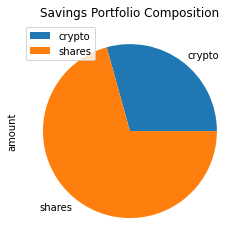

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
# Assigning variables to calculate the savings to emergency fund
total_savings = (int(crypto_total) + int(shares_total))
short_savings = (int(emergency_fund) - int(total_savings))          
#Validate saving health
# Utilising ">", "==", "<" to calculate the relevant data to be printed
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations for meeting the goal in this fund.")
elif total_savings < emergency_fund: 
    print(f"You are ${short_savings} short of your emergency fund.")

Congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Using alpaca API to pull data with "get_bars"
timeframe = "1Day"

five_year_tickers = ["SPY", "AGG"]

df_five_year_tickers = alpaca.get_bars(
    five_year_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_five_year_tickers.head();

# Reorganize the DataFrame
# Separate ticker data
SPY = df_five_year_tickers[df_five_year_tickers["symbol"]=="SPY"].drop("symbol",axis=1)
AGG = df_five_year_tickers[df_five_year_tickers["symbol"]=="AGG"].drop("symbol",axis=1)


# Concatenate the ticker DataFrames
# Concatenating the data to a single dataframe of the tickers
df_five_year_tickers = pd.concat([SPY, AGG], axis = 1, keys = ["SPY", "AGG"])

# Display sample data
df_five_year_tickers.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Using the MCSimulation app to calculate the data needed for a Monte Carlo Simulation
# Setting the weight and number of days to determine our predictions.
MC_even_dist = MCSimulation(
    portfolio_data = df_five_year_tickers,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Desktop\module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000235,0.994085,0.999856,0.997690,0.998955,0.994460,0.987157,0.996775,1.004165,0.980683,...,1.008575,1.004544,1.006439,0.998051,1.014981,1.007167,0.991926,0.998205,1.004631,0.990100
2,1.001990,0.994775,1.004225,1.001092,1.002686,0.991230,0.995407,1.004378,1.000843,0.973982,...,0.998146,1.004547,1.011781,1.000777,1.023621,1.001260,1.006454,1.001473,1.003369,0.990942
3,0.995107,0.988983,1.007117,1.003487,1.010783,1.003070,1.003220,1.011521,0.996880,0.977760,...,0.982931,1.004680,1.019830,1.002933,1.027258,1.001035,1.015230,1.000730,1.015405,1.003051
4,0.996213,0.993183,1.009686,0.990677,1.010851,1.008409,0.999255,1.005661,0.985992,0.992016,...,0.972306,1.015175,1.031316,1.010146,1.027364,0.996067,1.004368,1.000088,1.007122,1.000320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.116488,9.836149,19.589261,7.787924,15.112237,20.160306,10.342462,18.289885,5.930289,20.181538,...,13.860858,14.022855,14.025355,7.567824,19.070921,28.673215,3.366892,18.246543,30.968323,8.184615
7557,8.097856,9.861956,19.700991,7.865270,15.022253,20.133228,10.280226,18.182031,5.970497,20.426270,...,13.862905,14.076318,14.188897,7.564238,19.104396,28.793396,3.385301,18.207143,31.199230,8.257199
7558,8.152092,9.898016,19.829404,7.921795,14.975063,20.151079,10.314115,18.124674,5.873653,20.411754,...,13.819866,14.048558,14.267405,7.552934,18.993358,29.315602,3.434106,18.105684,31.213135,8.230806
7559,8.149638,9.883044,19.951987,7.906780,15.075804,20.156160,10.427005,18.050418,5.847288,20.380924,...,13.817991,13.999646,14.213579,7.494561,18.931056,29.180184,3.457396,18.028031,30.851957,8.332563


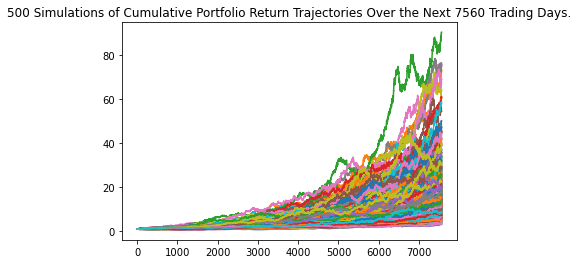

In [19]:
# Plot simulation outcomes
# Using the "plot_simulation" to display our Monte Carlo cumulative return data above
line_plot = MC_even_dist.plot_simulation()

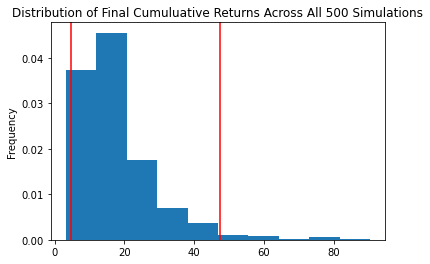

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# Utilising "summarize_cumulative_return" to calculate relevant data displayed
# in an "even table" below
even_table = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_table)

count           500.000000
mean             18.165888
std              11.448205
min               1.894092
25%              10.115525
50%              15.667678
75%              23.048574
max              72.207612
95% CI Lower      4.464848
95% CI Upper     49.479998
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# Calculating the lower and upper 95% intervals from our even table pulling
# relevant list attributes - see "[8]" and "[9]" and the reference to our initial investment above
even_ci_lower = round(even_table[8]*20000,2)
even_ci_upper = round(even_table[9]*20000,2)

# Print results
# Using our variables in a print statement
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89296.96 and $989599.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(even_table[8]*20000 * 1.5,2)
even_ci_upper = round(even_table[9]*20000 * 1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133945.44 and $1484399.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_five_year_tickers,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Desktop\module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005876,0.997419,1.002722,1.005531,1.004144,1.002245,1.006205,0.996144,0.991898,1.006191,...,0.985209,0.995526,1.002479,0.999443,1.001578,1.008732,1.006315,1.011767,1.004180,1.008601
2,1.000881,0.999058,1.005793,1.008859,0.998267,0.991430,0.998500,1.002870,0.994174,1.018290,...,0.981432,0.989488,1.003766,1.006052,1.000224,1.011268,1.002565,1.001223,0.997017,1.007317
3,1.007572,1.003624,1.005866,0.999888,0.985440,0.990130,0.987051,1.007119,0.976757,1.008285,...,0.991588,0.993811,1.002235,1.012435,1.003755,0.995344,0.995853,0.997078,1.002323,1.011592
4,1.007870,0.989672,1.002380,0.998309,0.981993,0.984222,0.988677,1.008067,0.990695,1.005511,...,1.002857,0.979488,0.994275,0.998683,1.007675,0.996611,1.005921,0.997788,1.012668,1.009200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.978842,1.677245,2.394477,1.205268,1.220206,1.577885,1.710565,1.585028,1.156375,1.716402,...,1.902513,1.281551,1.629052,1.571736,1.869496,2.447017,1.067855,2.120489,1.928002,1.218975
1257,1.963247,1.656339,2.391175,1.210490,1.209240,1.572289,1.709740,1.598342,1.156014,1.740576,...,1.899411,1.276542,1.638679,1.578271,1.862963,2.464437,1.065086,2.101199,1.928256,1.218446
1258,1.954446,1.660433,2.365751,1.209860,1.214610,1.591583,1.712980,1.586948,1.166345,1.752667,...,1.914443,1.261396,1.625635,1.552938,1.880139,2.455359,1.076147,2.120479,1.945710,1.226366
1259,1.923544,1.664238,2.377586,1.201210,1.212679,1.611737,1.715460,1.591438,1.177763,1.750963,...,1.911576,1.274911,1.627758,1.535951,1.881195,2.480089,1.082491,2.113470,1.958243,1.212053


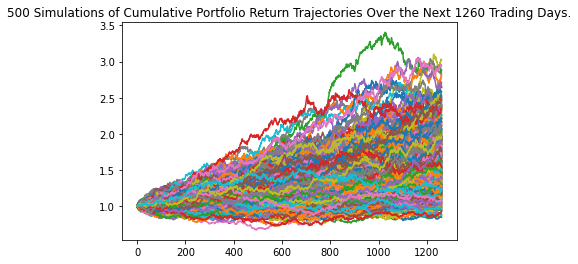

In [26]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

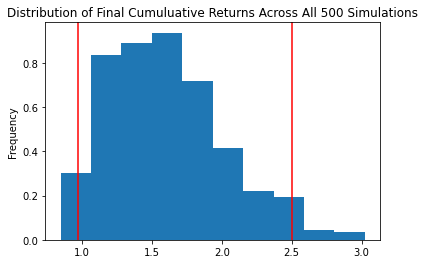

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_table = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_table)

count           500.000000
mean              1.603586
std               0.414341
min               0.845490
25%               1.282530
50%               1.540669
75%               1.878539
max               3.024122
95% CI Lower      0.972764
95% CI Upper      2.503273
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_five = round(even_table[8]*50000,2)
even_ci_upper_five = round(even_table[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower_five} and ${even_ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $48638.2 and $125163.65


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_five_year_tickers,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\User\Desktop\module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009378,1.008829,1.006773,1.003881,1.001098,0.992820,0.999665,1.002910,0.998753,1.000728,...,1.001856,1.001053,1.002559,0.994537,1.017373,1.006073,1.001498,0.999686,0.996633,1.006958
2,1.009755,1.011479,1.012120,0.995849,1.003812,1.003901,1.006287,1.012580,0.994930,1.003116,...,1.007149,0.995281,1.003206,1.006717,1.013230,1.008623,0.998023,1.006028,0.993582,1.006337
3,1.011076,1.011999,1.009201,1.014779,1.012293,1.004061,1.005663,1.009331,1.005299,0.995992,...,1.016560,0.994784,1.006082,0.998520,1.027528,1.009107,1.009165,1.007758,1.012476,1.006933
4,1.008978,1.012496,1.015434,1.017730,1.011398,1.011470,1.003683,0.999613,1.019516,0.994606,...,1.027577,1.007424,1.006850,1.001469,1.024478,1.018662,1.007399,1.005621,1.014130,0.995867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.527987,3.772365,4.130650,2.081383,2.962615,2.438297,2.280279,3.250517,2.917205,2.582044,...,2.370208,1.592756,2.803402,4.234710,4.238549,5.141590,3.741245,2.227983,2.282290,3.067506
2517,2.531508,3.722818,4.122662,2.064362,2.933669,2.432039,2.289034,3.293106,2.933800,2.579612,...,2.373171,1.603179,2.756431,4.192219,4.257067,5.167695,3.793468,2.246407,2.284363,3.034065
2518,2.515976,3.724359,4.163921,2.074308,2.916535,2.456479,2.305884,3.291813,2.966017,2.593330,...,2.369362,1.620362,2.767023,4.213755,4.256034,5.139141,3.780474,2.250121,2.288273,3.025713
2519,2.506671,3.740395,4.130900,2.099016,2.943159,2.426076,2.302668,3.306063,2.973720,2.582038,...,2.364936,1.619779,2.795275,4.237145,4.252106,5.190719,3.805078,2.253263,2.299441,2.983732


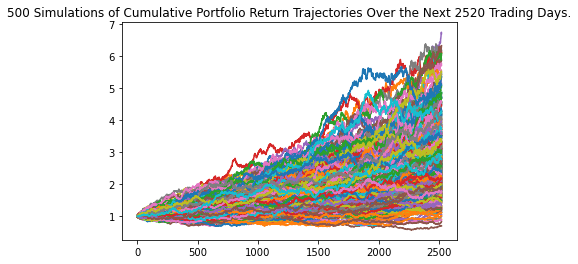

In [32]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

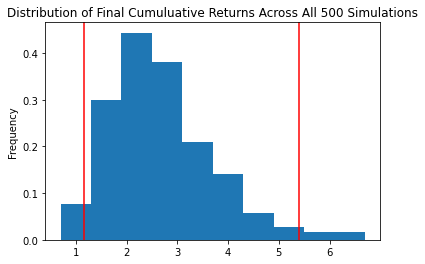

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_table = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_table)

count           500.000000
mean              2.684447
std               1.033536
min               0.699165
25%               1.931448
50%               2.509102
75%               3.191365
max               6.694353
95% CI Lower      1.160374
95% CI Upper      5.391115
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_ten = round(even_table[8]*50000,2)
even_ci_upper_ten = round(even_table[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower_ten} and ${even_ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $58018.72 and $269555.76
